In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# importing the csv file, do basic inspection, dropping NaN values

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
sample = df.sample(15)

In [5]:
sample

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
200,201,20,RM,80.0,8546,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,140000
226,227,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Abnorml,290000
763,764,60,RL,82.0,9430,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,337000
1321,1322,20,RL,NaN,6627,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,72500
494,495,30,RM,50.0,5784,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,91300
117,118,20,RL,74.0,8536,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,New,Partial,155000
1174,1175,70,RL,80.0,16560,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,239000
1228,1229,120,RL,65.0,8769,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,New,Partial,367294
984,985,90,RL,75.0,10125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,COD,Normal,126000
1097,1098,120,RL,NaN,3696,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,170000


In [6]:
# dropping empty entries (rows)
df.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [7]:
df.shape

(1460, 81)

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
# methods for selecting a few columns to see the NaN values associated with each column
df.iloc[:,[0,1,2,3,4,5]].isna().sum()
df[df.columns[0:9]].isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
dtype: int64

In [10]:
dflist = list(df)

In [11]:
len(dflist)

81

In [12]:
# function for creating table to show columns with too many NaN values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [13]:
missing_values = missing_values_table(df)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


drop the first 5, since missing values exceed or are around 50%

In [14]:
missing_values.iloc[0:6]

,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7


In [15]:
# dropping columns with too many NaN values
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

In [16]:
df.shape

(1460, 76)

In [17]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

# Convert categorical variables to numbers withou orders with get_dummies method

In [18]:
# function for creating table with all columns with categorical variable
def all_types(df):
    column_names = df.columns.tolist()
    df2 = pd.Series( (v for v in column_names) )
    all_types = df.dtypes
    all_types_table = pd.concat([df2,all_types],axis=1)
    all_types_table = all_types_table.rename(
    columns = {0: 'variables', 1 : 'Type'})
    all_object_table = all_types_table['Type']=='object'
    return all_object_table[all_object_table]

In [19]:
# turning all columns with categorical variables into a list 
cate_var = all_types(df)
df_cat = pd.DataFrame({'Names':cate_var.index, 'Type':cate_var.values})
cate_var = list(df_cat.loc[:,'Names'])

In [20]:
# convert categorical variables into dummy values, concat a new DataFrame based on dummy variables
x = df[cate_var]

In [21]:
X = pd.get_dummies(data=x, drop_first=True)

In [22]:
df.drop(cate_var, axis =1, inplace=True)

In [23]:
final_df = pd.concat([df, X], axis=1)

# Calculate the Square meter price and do a full correlation test based on the square meter price

In [24]:
final_df['PriceSM'] = final_df.SalePrice/final_df.LotArea

In [25]:
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa,PriceSM
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,

In [26]:
pd.set_option('display.max_rows', final_df.shape[0]+1)

In [27]:
final_df.corr(method='pearson')['PriceSM'].sort_values()

LotFrontage             -0.392945
ExterQual_TA            -0.354301
LotArea                 -0.329131
BsmtQual_TA             -0.304113
KitchenQual_TA          -0.298530
MSZoning_RL             -0.285807
MasVnrType_None         -0.245624
Foundation_CBlock       -0.244303
Neighborhood_NAmes      -0.206222
Exterior1st_Wd Sdng     -0.193265
BedroomAbvGr            -0.180363
HeatingQC_TA            -0.179103
Exterior2nd_Wd Sdng     -0.175918
GarageFinish_Unf        -0.170413
Exterior2nd_Plywood     -0.161303
BsmtFinType1_Rec        -0.145518
Neighborhood_Sawyer     -0.132540
EnclosedPorch           -0.132413
Neighborhood_Edwards    -0.122496
SaleType_WD             -0.122067
LandContour_Low         -0.117627
Condition1_Feedr        -0.113931
BsmtFinType1_BLQ        -0.113662
HouseStyle_1Story       -0.111134
LandSlope_Sev           -0.110736
KitchenAbvGr            -0.109208
KitchenQual_Fa          -0.108702
Neighborhood_IDOTRR     -0.102742
BldgType_Duplex         -0.100094
Neighborhood_O

# based on the correlation (positive and negative values) above, 10 columns will be kept for further analysis

In [28]:
df_clean = final_df[['BldgType_Twnhs','MSSubClass','BldgType_TwnhsE','YearBuilt','OverallQual','GarageYrBlt',
                     'Foundation_PConc','YearRemodAdd','LotFrontage','ExterQual_TA','PriceSM','SalePrice']]

In [29]:
df_clean.head()

,BldgType_Twnhs,MSSubClass,BldgType_TwnhsE,YearBuilt,OverallQual,GarageYrBlt,Foundation_PConc,YearRemodAdd,LotFrontage,ExterQual_TA,PriceSM,SalePrice
0,0,60,0,2003,7,2003.0,1,2003,65.0,0,24.674556,208500
1,0,20,0,1976,6,1976.0,0,1976,80.0,1,18.906250,181500
2,0,60,0,2001,7,2001.0,1,2002,68.0,0,19.866667,223500
3,0,70,0,1915,7,1998.0,0,1970,60.0,1,14.659686,140000
4,0,60,0,2000,8,2000.0,1,2000,84.0,0,17.531557,250000


# Calculate various linear regression models

In [30]:
# assigning a constant
df_clean = sm.add_constant(df_clean)

In [31]:
df_clean.head()

,const,BldgType_Twnhs,MSSubClass,BldgType_TwnhsE,YearBuilt,OverallQual,GarageYrBlt,Foundation_PConc,YearRemodAdd,LotFrontage,ExterQual_TA,PriceSM,SalePrice
0,1.0,0,60,0,2003,7,2003.0,1,2003,65.0,0,24.674556,208500
1,1.0,0,20,0,1976,6,1976.0,0,1976,80.0,1,18.906250,181500
2,1.0,0,60,0,2001,7,2001.0,1,2002,68.0,0,19.866667,223500
3,1.0,0,70,0,1915,7,1998.0,0,1970,60.0,1,14.659686,140000
4,1.0,0,60,0,2000,8,2000.0,1,2000,84.0,0,17.531557,250000


In [32]:
# build a model based on bulidingTypes
y1 = df_clean['SalePrice']
x1 = df_clean[['const','BldgType_Twnhs','BldgType_TwnhsE']]

buildingTypes_mlr = sm.OLS(y1,x1).fit()

In [33]:
buildingTypes_mlr.summary()
# R-squared seems too low

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.172
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           0.000795
Time:                        23:37:13   Log-Likelihood:                -18537.
No. Observations:                1460   AIC:                         3.708e+04
Df Residuals:                    1457   BIC:                         3.710e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.823e+05   2191.549     83.190      0.000    1.78e+05    1.87e+05
BldgType_Twnhs   -4.64e+04   1.23e+04     -3.785      0.000   -7.05e+04   -2.24e+04
BldgType_TwnhsE  -356.3762   7726.516     -0.046      0.963   -1.55e+04    1.48e+04
==============================================================================
Omnibus:                      610.304   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3464.926
Skew:                           1.876   Prob(JB):                         0.00
Kurtosis:                       9.549   Cond. No.                         5.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# build a model based on MSSubClass
y1 = df_clean['SalePrice']
x1 = df_clean[['const','MSSubClass']]

MSSubClass_lr = sm.OLS(y1,x1).fit()

In [35]:
MSSubClass_lr.summary()
# same, R squared seems to low

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     10.43
Date:                Sun, 13 Sep 2020   Prob (F-statistic):            0.00127
Time:                        23:37:13   Log-Likelihood:                -18539.
No. Observations:                1460   AIC:                         3.708e+04
Df Residuals:                    1458   BIC:                         3.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.899e+05   3474.287     54.667      0.000    1.83e+05    1.97e+05
MSSubClass  -158.2897     49.009     -3.230      0.001    -254.426     -62.153
==============================================================================
Omnibus:                      605.541   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3430.629
Skew:                           1.859   Prob(JB):                         0.00
Kurtosis:                       9.525   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# build a model based on YearBuilt and YearRemodAdd
y1 = df_clean['SalePrice']
x1 = df_clean[['const','YearBuilt','YearRemodAdd']]

year_mlr = sm.OLS(y1,x1).fit()

In [37]:
year_mlr.summary()
# higher R squared value, looks much better than the two regression models above

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     364.2
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          5.27e-129
Time:                        23:37:14   Log-Likelihood:                -18248.
No. Observations:                1460   AIC:                         3.650e+04
Df Residuals:                    1457   BIC:                         3.652e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.917e+06   1.64e+05    -23.840      0.000   -4.24e+06   -3.59e+06
YearBuilt      901.4469     69.867     12.902      0.000     764.397    1038.497
YearRemodAdd  1169.4666    102.210     11.442      0.000     968.972    1369.962
==============================================================================
Omnibus:                      770.140   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7817.918
Skew:                           2.248   Prob(JB):                         0.00
Kurtosis:                      13.407   Cond. No.                     2.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# since I honestly do not know how to correctly interpretate the data above, 
# I decide to take all variables and do a multiple regression on all of them

In [38]:
df_clean.isnull().sum()

const                 0
BldgType_Twnhs        0
MSSubClass            0
BldgType_TwnhsE       0
YearBuilt             0
OverallQual           0
GarageYrBlt          81
Foundation_PConc      0
YearRemodAdd          0
LotFrontage         259
ExterQual_TA          0
PriceSM               0
SalePrice             0
dtype: int64

In [39]:
# build a model based on MSSubClass
y1 = df_clean['SalePrice']
x1 = df_clean[['const','BldgType_Twnhs','MSSubClass','BldgType_TwnhsE','YearBuilt','OverallQual','Foundation_PConc','YearRemodAdd','ExterQual_TA']]

allvar_mlr = sm.OLS(y1,x1,missing='drop').fit()

In [42]:
allvar_mlr.summary()
# now my gut feeling tells me I should use this model to predict the SalePrice (also becaues I don't know any better)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     367.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:37:22   Log-Likelihood:                -17736.
No. Observations:                1460   AIC:                         3.549e+04
Df Residuals:                    1451   BIC:                         3.554e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.007e+06   1.71e+05     -5.875      0.000   -1.34e+06   -6.71e+05
BldgType_Twnhs   -5.664e+04   8533.441     -6.637      0.000   -7.34e+04   -3.99e+04
MSSubClass          21.1224     40.036      0.528      0.598     -57.412      99.657
BldgType_TwnhsE  -4.266e+04   5915.521     -7.212      0.000   -5.43e+04   -3.11e+04
YearBuilt          267.8474     60.298      4.442      0.000     149.567     386.127
OverallQual       3.762e+04   1235.473     30.450      0.000    3.52e+04       4e+04
Foundation_PConc -1926.5475   3565.312     -0.540      0.589   -8920.264    5067.169
YearRemodAdd       224.9590     79.197      2.841      0.005      69.607     380.311
ExterQual_TA     -1.777e+04   3665.622     -4.848      0.000    -2.5e+04   -1.06e+04
==============================================================================
Omnibus:                      725.355   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9994.890
Skew:                           1.967   Prob(JB):                         0.00
Kurtosis:                      15.199   Cond. No.                     4.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
df_clean = df_clean.assign(SalePricePredict = allvar_mlr.predict(df_clean[['const','BldgType_Twnhs',
                                                                           'MSSubClass','BldgType_TwnhsE','YearBuilt','OverallQual','Foundation_PConc','YearRemodAdd','ExterQual_TA']]))

In [44]:
df_clean.sample(15)
# imho, the predictions look decent to me, so my model might be on a good way

,const,BldgType_Twnhs,MSSubClass,BldgType_TwnhsE,YearBuilt,OverallQual,GarageYrBlt,Foundation_PConc,YearRemodAdd,LotFrontage,ExterQual_TA,PriceSM,SalePrice,SalePricePredict
1388,1.0,0,20,0,2006,9,2006.0,1,2007,42.0,0,25.349181,377500,318500.674250
527,1.0,0,60,0,2008,9,2008.0,1,2008,67.0,0,29.854228,446261,320106.223468
1374,1.0,0,60,0,2005,7,2005.0,1,2005,85.0,0,23.529412,250000,243388.065827
712,1.0,0,120,1,1988,8,1988.0,1,1989,40.0,0,40.462428,189000,231460.160798
849,1.0,0,80,0,1976,6,1976.0,0,1994,80.0,0,19.479167,187000,197875.067706
95,1.0,0,60,0,1993,6,1993.0,1,1993,NaN,0,18.945212,185000,199854.519772
40,1.0,0,20,0,1965,6,1965.0,0,1965,84.0,1,18.480018,160000,169368.193567
1326,1.0,0,30,0,1931,3,NaN,0,2006,70.0,1,18.501171,79000,56836.315550
410,1.0,0,20,0,1958,5,1958.0,0,1958,68.0,1,6.268937,60000,128298.679529
6,1.0,0,20,0,2004,8,2004.0,1,2005,75.0,0,30.444268,307000,279895.192228


In [45]:
df_clean.shape

(1460, 14)

In [46]:
df_clean.isnull().sum()

const                 0
BldgType_Twnhs        0
MSSubClass            0
BldgType_TwnhsE       0
YearBuilt             0
OverallQual           0
GarageYrBlt          81
Foundation_PConc      0
YearRemodAdd          0
LotFrontage         259
ExterQual_TA          0
PriceSM               0
SalePrice             0
SalePricePredict      0
dtype: int64

In [47]:
# and last not least, lets do a linear regression based OverallQual, since it has a high t value
y1 = df_clean['SalePrice']
x1 = df_clean[['const','OverallQual']]

OverallQual_lr = sm.OLS(y1,x1).fit()

In [48]:
OverallQual_lr.summary()
#OverallQual has a high R squared value, high t value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          2.19e-313
Time:                        23:37:26   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# lets plot the price against the OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

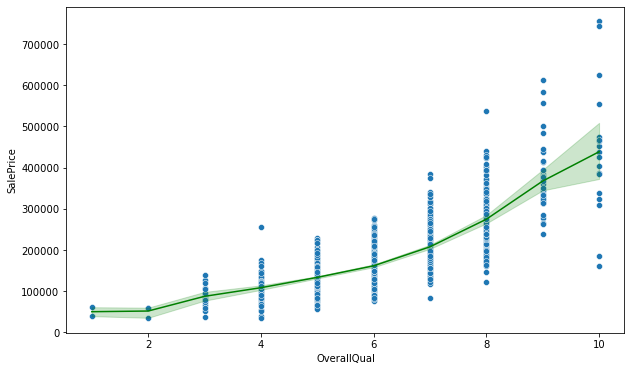

In [50]:
fig, ax=plt.subplots(figsize=(10,6))
sns.scatterplot(data=df_clean, x = 'OverallQual', y='SalePrice', ax=ax);
sns.lineplot(data=df_clean,x='OverallQual',y='SalePrice',color='green',ax=ax)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

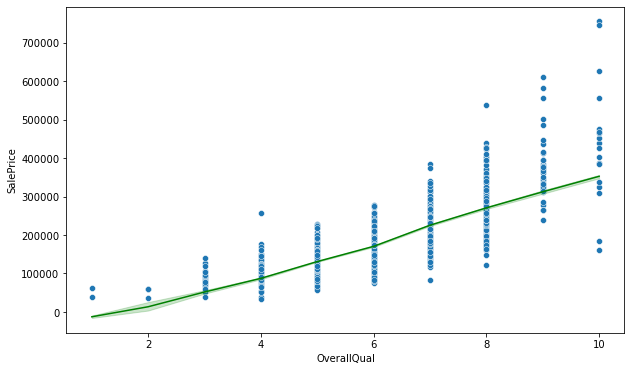

In [51]:
# one last plot of predicted sales price vs OverallQual
fig, ax=plt.subplots(figsize=(10,6))
sns.scatterplot(data=df_clean, x = 'OverallQual', y='SalePrice', ax=ax);
sns.lineplot(data=df_clean,x='OverallQual',y='SalePricePredict',color='green',ax=ax)

# Conclusion: After filtering out the 10 most plausible / influential variables for the SalePrice, based on adjusted square meter price, 
# we were able to get a somewhat sensible price prediciton. One of the most influential price influencing variable is the OverallQual,
# which is no surprise. 

In [52]:
# I could still need some help/guidance on interpretation of the OLS tables